#### Libraries

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans


# EDA
Exploratory data analysis

## Our dataset

### Display of the first few rows of the DataFrame

In [147]:
#Understanding column meaning and the whole dataset
df = pd.read_csv('alien_galaxy.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'alien_galaxy.csv'

### Data and their data type

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Peace_Treaty_Accords                 2005 non-null   float64
 1   Technological_Advancements           2028 non-null   float64
 2   Ammonia_Concentration                2023 non-null   float64
 3   Precious_Metal_Trade_Tons            2025 non-null   float64
 4   Food_Production_Tons                 1994 non-null   float64
 5   Trade_Agreements_Signed              2033 non-null   float64
 6   Last_Contact_Days                    2006 non-null   float64
 7   Discovery_Date                       2014 non-null   object 
 8   Mineral_Extraction_Tons              2032 non-null   float64
 9   Galactic_Visits                      2020 non-null   float64
 10  Sulfur_Concentration                 2031 non-null   float64
 11  Exploration_Missions          

### Filtering of the Dataframe to retain only the relevant columns

In [ ]:
# columns to keep based on project requirements
columns_to_keep = [

     'Ammonia_Concentration', 'Sulfur_Concentration', 'HeavyMetals_Concentration', 
    'CO2_Concentration', 'Hydrogen_Concentration', 'Precious_Metal_Trade_Tons', 
    'Food_Production_Tons', 'Mineral_Extraction_Tons', 'Resource_Mining_Operations', 
    'Resource_Allocation_Credits', 'Galactic_Visits', 'Military_Engagements', 'Technological_Advancements', 
    'Biological_Research_Units', 'Offspring_Colonies', 'Liquid_Energy_Consumption_Terawatts', 
    'Peace_Treaty_Accords', 'Trade_Agreements_Signed', 'Terraforming_Initiatives', 
    'Alien_Civilization_Level', 'Alien_Population_Count', 'Exploration_Missions', 
]

df_cleaned = df[columns_to_keep]
print('From 34 to' , len(columns_to_keep), "features")


From 34 to 22 features


#### Excluded 

- Last_Contact_Days
- Discovery_Date
- Cultural_Exchange_Programs
- Young_Colonies
- Planet_ID
- Colonization_Year
- Species_Expansion_Response
- Dominant_Species_Social_Structure
- Interstellar_Contact_Cost,
- Interplanetary_Communications
- Colonization_Year

from 34 to 22 columns

### Handle Non-Numerical Columns
Alien_civilization_level handling data type, since it is the only parameter choosen to have object data type values.

In [122]:
# Display all unique values 
unique_values = df_cleaned['Alien_Civilization_Level'].unique()
print("Unique values for Alien_Civilization_Level:", unique_values)


Unique values for Alien_Civilization_Level: ['Master' 'Graduation' 'PhD' nan '2n Cycle' 'Basic']


#### Encoding

In [123]:
# Definintion of the mapping for ordinal encoding
civilization_mapping = {
    'Basic': 1,
    'Graduation': 2,
    '2n Cycle': 3,
    'Master': 4,
    'PhD': 5
}

# Appliyng the mapping to encode values
df_cleaned['Alien_Civilization_Level_Encoded'] = df_cleaned['Alien_Civilization_Level'].map(civilization_mapping)

# Drop the original column (optional)
df_cleaned.drop(columns=['Alien_Civilization_Level'], inplace=True)

# Verify the encoding by printing the first few rows
print(df_cleaned[['Alien_Civilization_Level_Encoded']].head())


   Alien_Civilization_Level_Encoded
0                               4.0
1                               4.0
2                               2.0
3                               4.0
4                               2.0


C:\Users\franc\AppData\Local\Temp\ipykernel_22080\2672733729.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Alien_Civilization_Level_Encoded'] = df_cleaned['Alien_Civilization_Level'].map(civilization_mapping)
C:\Users\franc\AppData\Local\Temp\ipykernel_22080\2672733729.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['Alien_Civilization_Level'], inplace=True)


## Normalizing data


In [124]:
scaler = StandardScaler()

# Apply scaling while leaving NaN values untouched
scaled_array = scaler.fit_transform(df_cleaned)

# Convert the scaled array back into a DataFrame, maintaining the same index and columns
df_scaled = pd.DataFrame(scaled_array, index=df_cleaned.index, columns=df_cleaned.columns)

# Display scaled DataFrame
print("Scaled DataFrame with NaN values intact:")
print(df_scaled.head())

Scaled DataFrame with NaN values intact:


   Ammonia_Concentration  Sulfur_Concentration  HeavyMetals_Concentration  \
0              -0.475496             -1.402814                   0.966070   
1               0.517206              0.718116                   0.008491   
2              -0.475496                   NaN                  -0.949089   
3              -0.475496              0.011139                   0.008491   
4              -1.468197              0.011139                   0.008491   

   CO2_Concentration  Hydrogen_Concentration  Precious_Metal_Trade_Tons  \
0           1.577241                1.120951                  -0.078801   
1           1.577241                0.188962                   1.215279   
2          -0.153650               -1.001864                   2.223899   
3                NaN               -0.441339                   1.196248   
4           0.884884                0.892804                  -0.288137   

   Food_Production_Tons  Mineral_Extraction_Tons  Resource_Mining_Operations  \
0    

##### Side note


Along the project the normalization of data occurs at two different times.
Now we are choosing to use StandardScaler to standardize data before applying distance-based imputation methods (KNN Imputer) as it helps maintain the spread of data for more accuracy.

A second normalization will occur in the second part of the project, as the clustering algorithms used are range-sensitive. In that case MinMaxScaler will be applied.


## Missing values 


### Visualizing missing values (before)

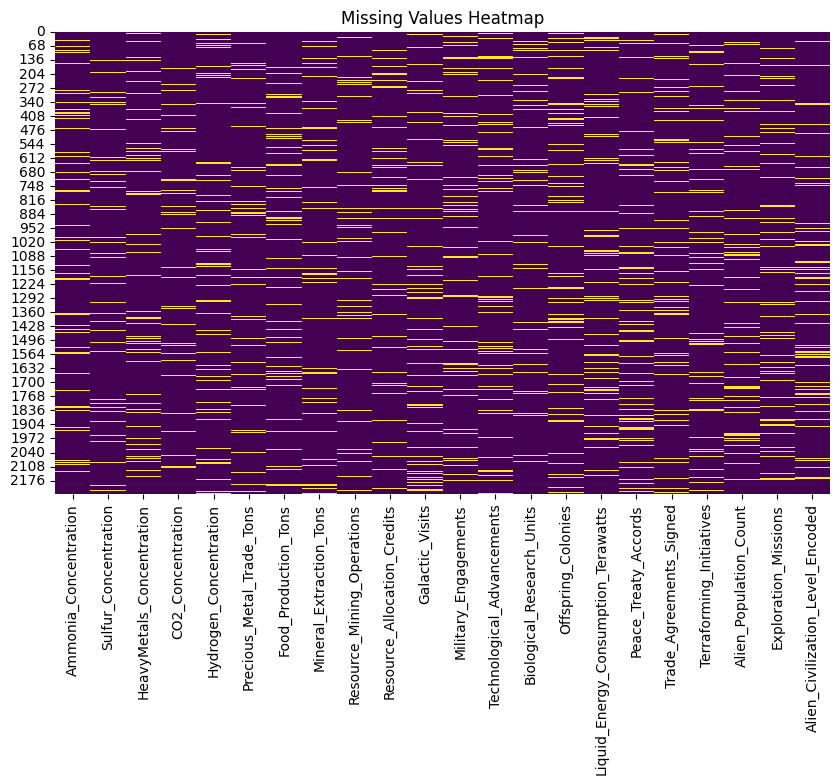

In [125]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_scaled.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


- X-axis: Each label represents a different column (or feature) in our dataset. 
- Y-axis: Each label represents the row index in our dataset.
- Interpretation of the Heatmap :
Yellow (bright) lines indicate the presence of missing values in the dataset. Each yellow line represents a missing value in a specific cell.
Purple (dark) areas indicate that values are present (i.e., no missing values in those cells).


### Quantification missing values

In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum() #Total missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df) # Percentage of missing values
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) # Make a table with the results
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'}
    )                                                           #Rename the columns
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[      # Sort the table by percentage of missing descending
        mis_val_table_ren_columns.iloc[:, 1] != 0
    ].sort_values('% of Total Values', ascending=False).round(1)
                                                                         
    print("Selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    #Return missing information
    return mis_val_table_ren_columns

missing_values_table(df_scaled)


Selected dataframe has 22 columns.
There are 22 columns that have missing values.


,Missing Values,% of Total Values
Liquid_Energy_Consumption_Terawatts,248,11.1
Food_Production_Tons,246,11.0
Alien_Population_Count,241,10.8
Offspring_Colonies,238,10.6
Peace_Treaty_Accords,235,10.5
Hydrogen_Concentration,231,10.3
Resource_Mining_Operations,231,10.3
Terraforming_Initiatives,230,10.3
Alien_Civilization_Level_Encoded,222,9.9
Exploration_Missions,222,9.9


### Dropping rows with missing values from the cleaned dataset
(not our approach)

In [127]:

df_cleaned_no_missing = df_scaled.dropna()

# Verify that no missing values remain
print(f"Number of rows before dropping: {df_cleaned.shape[0]}")
print(f"Number of rows after dropping: {df_cleaned_no_missing.shape[0]}")
print(f"Number of missing values: {df_cleaned_no_missing.isnull().sum().sum()}")  # Should be 0

Number of rows before dropping: 2240
Number of rows after dropping: 250
Number of missing values: 0


Dropping rows is not the right method for our problem (since it is clustering).
We chose to retain as much useful data as possible while handling missing values (cause we observed that the dataset was dropping from 2176 to 232 row therefore too many values wasted).

### Imputing missing values
(not our approach)
- not ideal as it not so reliable

In [128]:
from sklearn.impute import SimpleImputer
# Create a copy of df_cleaned with the original missing values
df_imputed = df_cleaned.copy()

# For numerical columns, fill missing values with the mean
numerical_cols = df_imputed.select_dtypes(include=['float64', 'int64']).columns
imputer_mean = SimpleImputer(strategy='mean')
df_imputed.loc[:, numerical_cols] = imputer_mean.fit_transform(df_imputed[numerical_cols])

# Verify that df_cleaned still has missing values and df_imputed does not
print("Missing values in df_scaled:")
print(df_scaled.isnull().sum().sum())  # Should be greater than 0 if there are missing values

print("Missing values in df_imputed:")
print(df_imputed.isnull().sum().sum())  # Should be 0 if all missing values were imputed




Missing values in df_scaled:
4863
Missing values in df_imputed:
0


### KNN imputation
Our approach

In [ ]:
# Identify numerical columns in the dataset
numerical_cols = df_scaled.select_dtypes(include=['float64', 'int64']).columns

#  Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')  # 'distance' can be used for weighted imputation

#  Create a copy of the original dataset for imputation
df_knn_imputed = df_scaled.copy()

#  Apply KNN Imputer to the numerical columns in the copied dataset
df_knn_imputed[numerical_cols] = knn_imputer.fit_transform(df_knn_imputed[numerical_cols])

#  Verify imputation results
print("Remaining missing values in the imputed dataset:")
print(df_knn_imputed.isnull().sum())

# Confirm that the original dataset is unchanged
print("Remaining missing values in the original dataset:")
print(df_scaled.isnull().sum())

# Preview the imputed dataset
print("Preview of the imputed dataset:")
print(df_knn_imputed.head())



Remaining missing values in the imputed dataset:
Ammonia_Concentration                  0
Sulfur_Concentration                   0
HeavyMetals_Concentration              0
CO2_Concentration                      0
Hydrogen_Concentration                 0
Precious_Metal_Trade_Tons              0
Food_Production_Tons                   0
Mineral_Extraction_Tons                0
Resource_Mining_Operations             0
Resource_Allocation_Credits            0
Galactic_Visits                        0
Military_Engagements                   0
Technological_Advancements             0
Biological_Research_Units              0
Offspring_Colonies                     0
Liquid_Energy_Consumption_Terawatts    0
Peace_Treaty_Accords                   0
Trade_Agreements_Signed                0
Terraforming_Initiatives               0
Alien_Population_Count                 0
Exploration_Missions                   0
Alien_Civilization_Level_Encoded       0
dtype: int64
Remaining missing values in the orig

>succesfull imputation

#### Checking df_knn_imputed

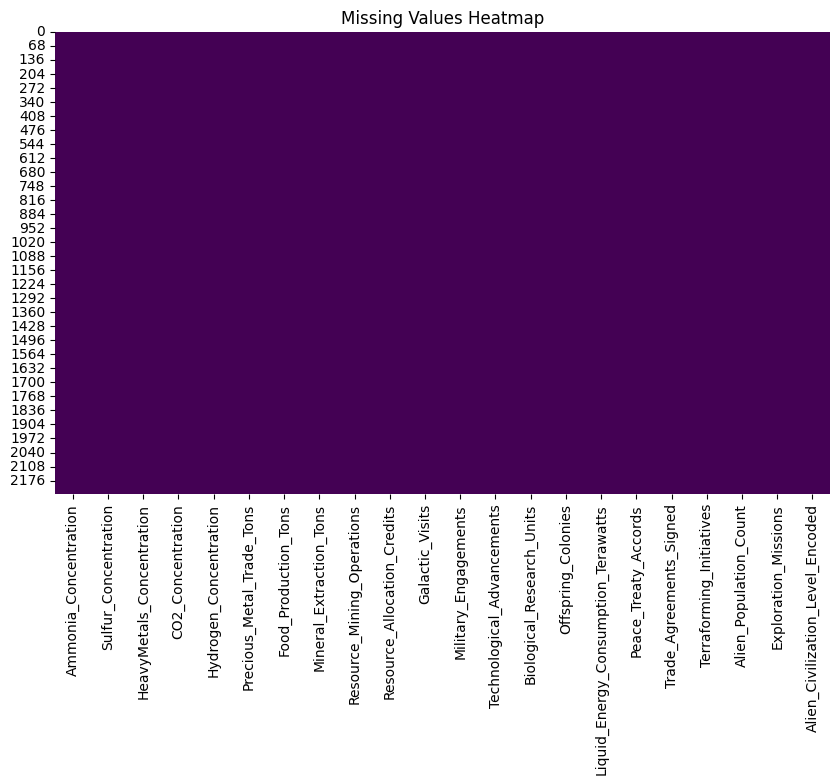

Selected dataframe has 22 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_knn_imputed.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
print(missing_values_table(df_knn_imputed))

### Comparison df_cleaned / df_knn_imputed
snippet of df cleaned where there were missing values and a snippet of the df_knn_imputed where those missing values have been adjusted

In [ ]:

df_scaled.head()

,Ammonia_Concentration,Sulfur_Concentration,HeavyMetals_Concentration,CO2_Concentration,Hydrogen_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Mineral_Extraction_Tons,Resource_Mining_Operations,Resource_Allocation_Credits,...,Technological_Advancements,Biological_Research_Units,Offspring_Colonies,Liquid_Energy_Consumption_Terawatts,Peace_Treaty_Accords,Trade_Agreements_Signed,Terraforming_Initiatives,Alien_Population_Count,Exploration_Missions,Alien_Civilization_Level_Encoded
0,-0.475496,-1.402814,0.966070,1.577241,1.120951,-0.078801,2.037122,1.013385,NaN,0.982334,...,-0.265988,2.496522,-0.824266,1.023837,-0.268687,-0.693176,-0.283981,1.026208,0.454013,0.749942
1,0.517206,0.718116,0.008491,1.577241,0.188962,1.215279,0.575247,NaN,1.620764,-0.456505,...,-0.265988,0.094644,-0.824266,0.827455,-0.268687,-0.693176,-0.283981,0.419078,1.132677,0.749942
2,-0.475496,NaN,-0.949089,-0.153650,-1.001864,2.223899,0.676066,0.888002,2.238916,1.957817,...,-0.265988,1.550328,-0.824266,1.258899,NaN,NaN,-0.283981,0.663448,2.150674,-0.823221
3,-0.475496,0.011139,0.008491,NaN,-0.441339,1.196248,NaN,-0.500158,-0.542768,-0.578440,...,-0.265988,-0.615001,-0.824266,0.033004,-0.268687,0.364802,-0.283981,-0.323621,0.114680,0.749942
4,-1.468197,0.011139,0.008491,0.884884,0.892804,-0.288137,0.827294,0.055106,0.693536,-0.529666,...,-0.265988,0.713310,-0.824266,-0.038408,-0.268687,2.480756,-0.283981,0.230634,1.132677,-0.823221


In [ ]:
df_knn_imputed.head()

,Ammonia_Concentration,Sulfur_Concentration,HeavyMetals_Concentration,CO2_Concentration,Hydrogen_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Mineral_Extraction_Tons,Resource_Mining_Operations,Resource_Allocation_Credits,...,Technological_Advancements,Biological_Research_Units,Offspring_Colonies,Liquid_Energy_Consumption_Terawatts,Peace_Treaty_Accords,Trade_Agreements_Signed,Terraforming_Initiatives,Alien_Population_Count,Exploration_Missions,Alien_Civilization_Level_Encoded
0,-0.475496,-1.402814,0.966070,1.577241,1.120951,-0.078801,2.037122,1.013385,0.940797,0.982334,...,-0.265988,2.496522,-0.824266,1.023837,-0.268687,-0.693176,-0.283981,1.026208,0.454013,0.749942
1,0.517206,0.718116,0.008491,1.577241,0.188962,1.215279,0.575247,1.133393,1.620764,-0.456505,...,-0.265988,0.094644,-0.824266,0.827455,-0.268687,-0.693176,-0.283981,0.419078,1.132677,0.749942
2,-0.475496,-0.695838,-0.949089,-0.153650,-1.001864,2.223899,0.676066,0.888002,2.238916,1.957817,...,-0.265988,1.550328,-0.824266,1.258899,-0.268687,0.364802,-0.283981,0.663448,2.150674,-0.823221
3,-0.475496,0.011139,0.008491,-0.430593,-0.441339,1.196248,-0.584171,-0.500158,-0.542768,-0.578440,...,-0.265988,-0.615001,-0.824266,0.033004,-0.268687,0.364802,-0.283981,-0.323621,0.114680,0.749942
4,-1.468197,0.011139,0.008491,0.884884,0.892804,-0.288137,0.827294,0.055106,0.693536,-0.529666,...,-0.265988,0.713310,-0.824266,-0.038408,-0.268687,2.480756,-0.283981,0.230634,1.132677,-0.823221


## Distributions overlook and further selection

Getting rid of features with values with too little variance.

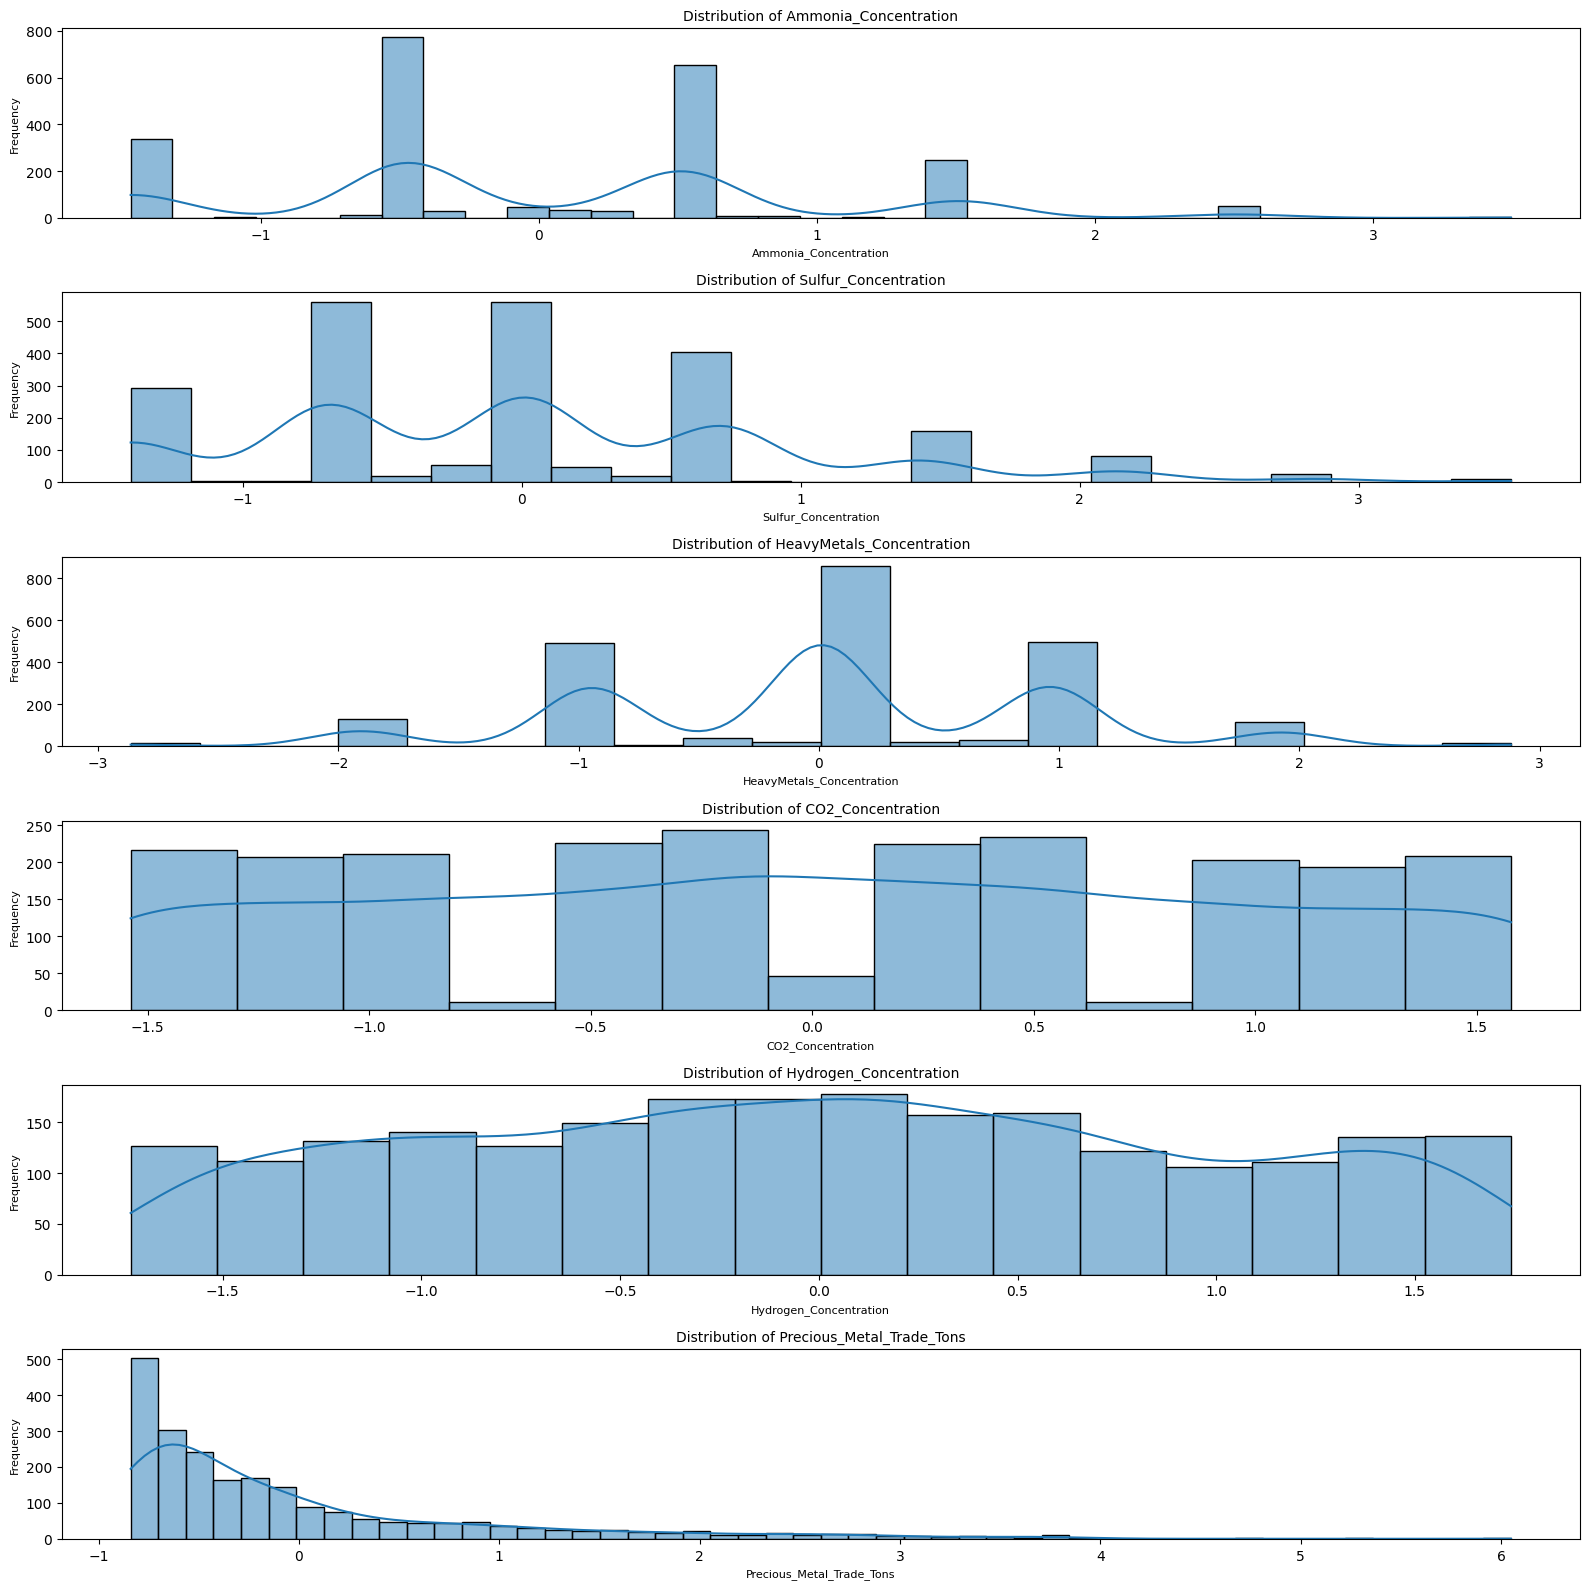

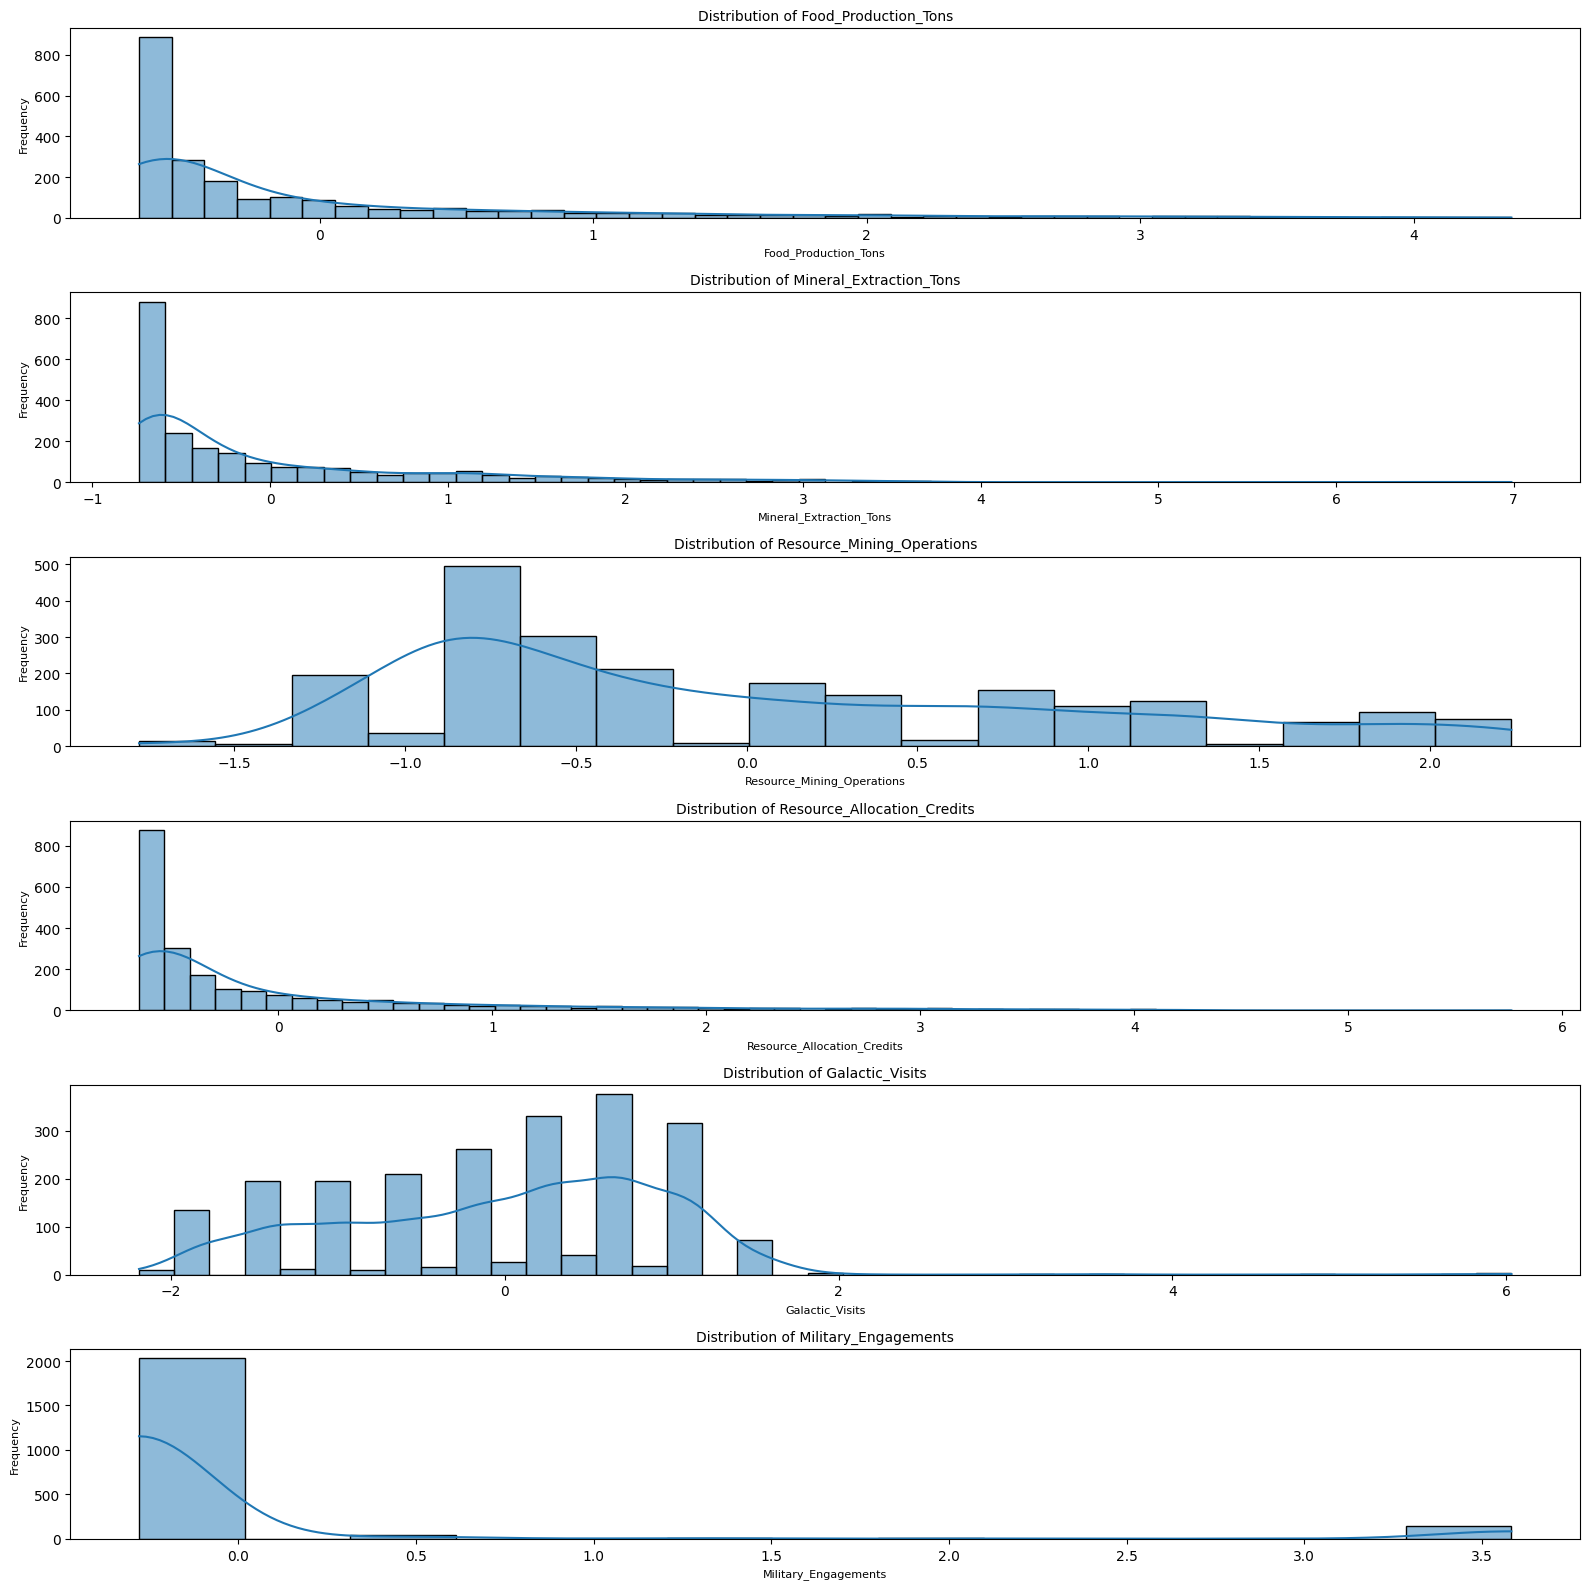

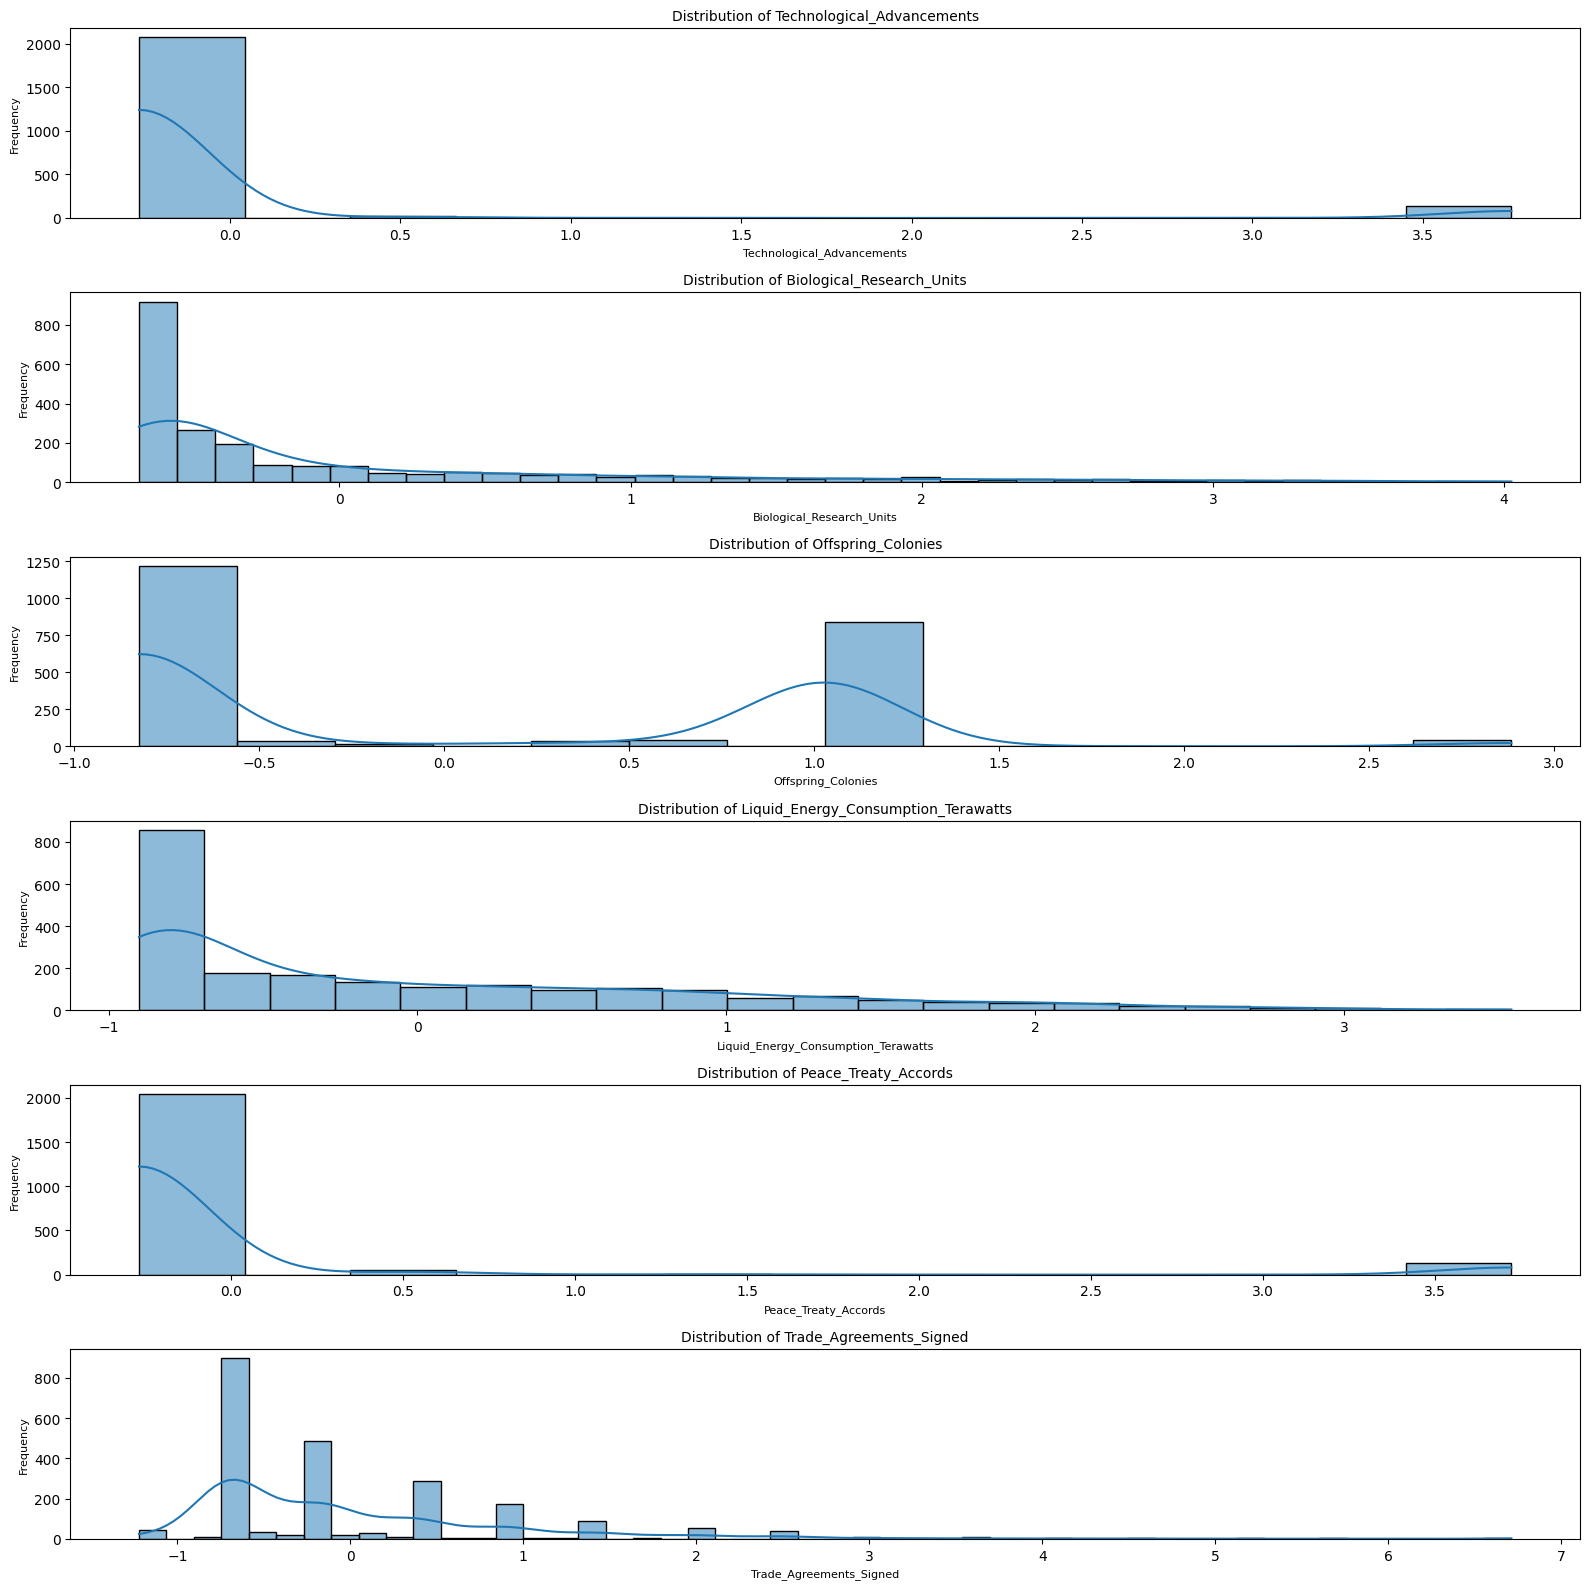

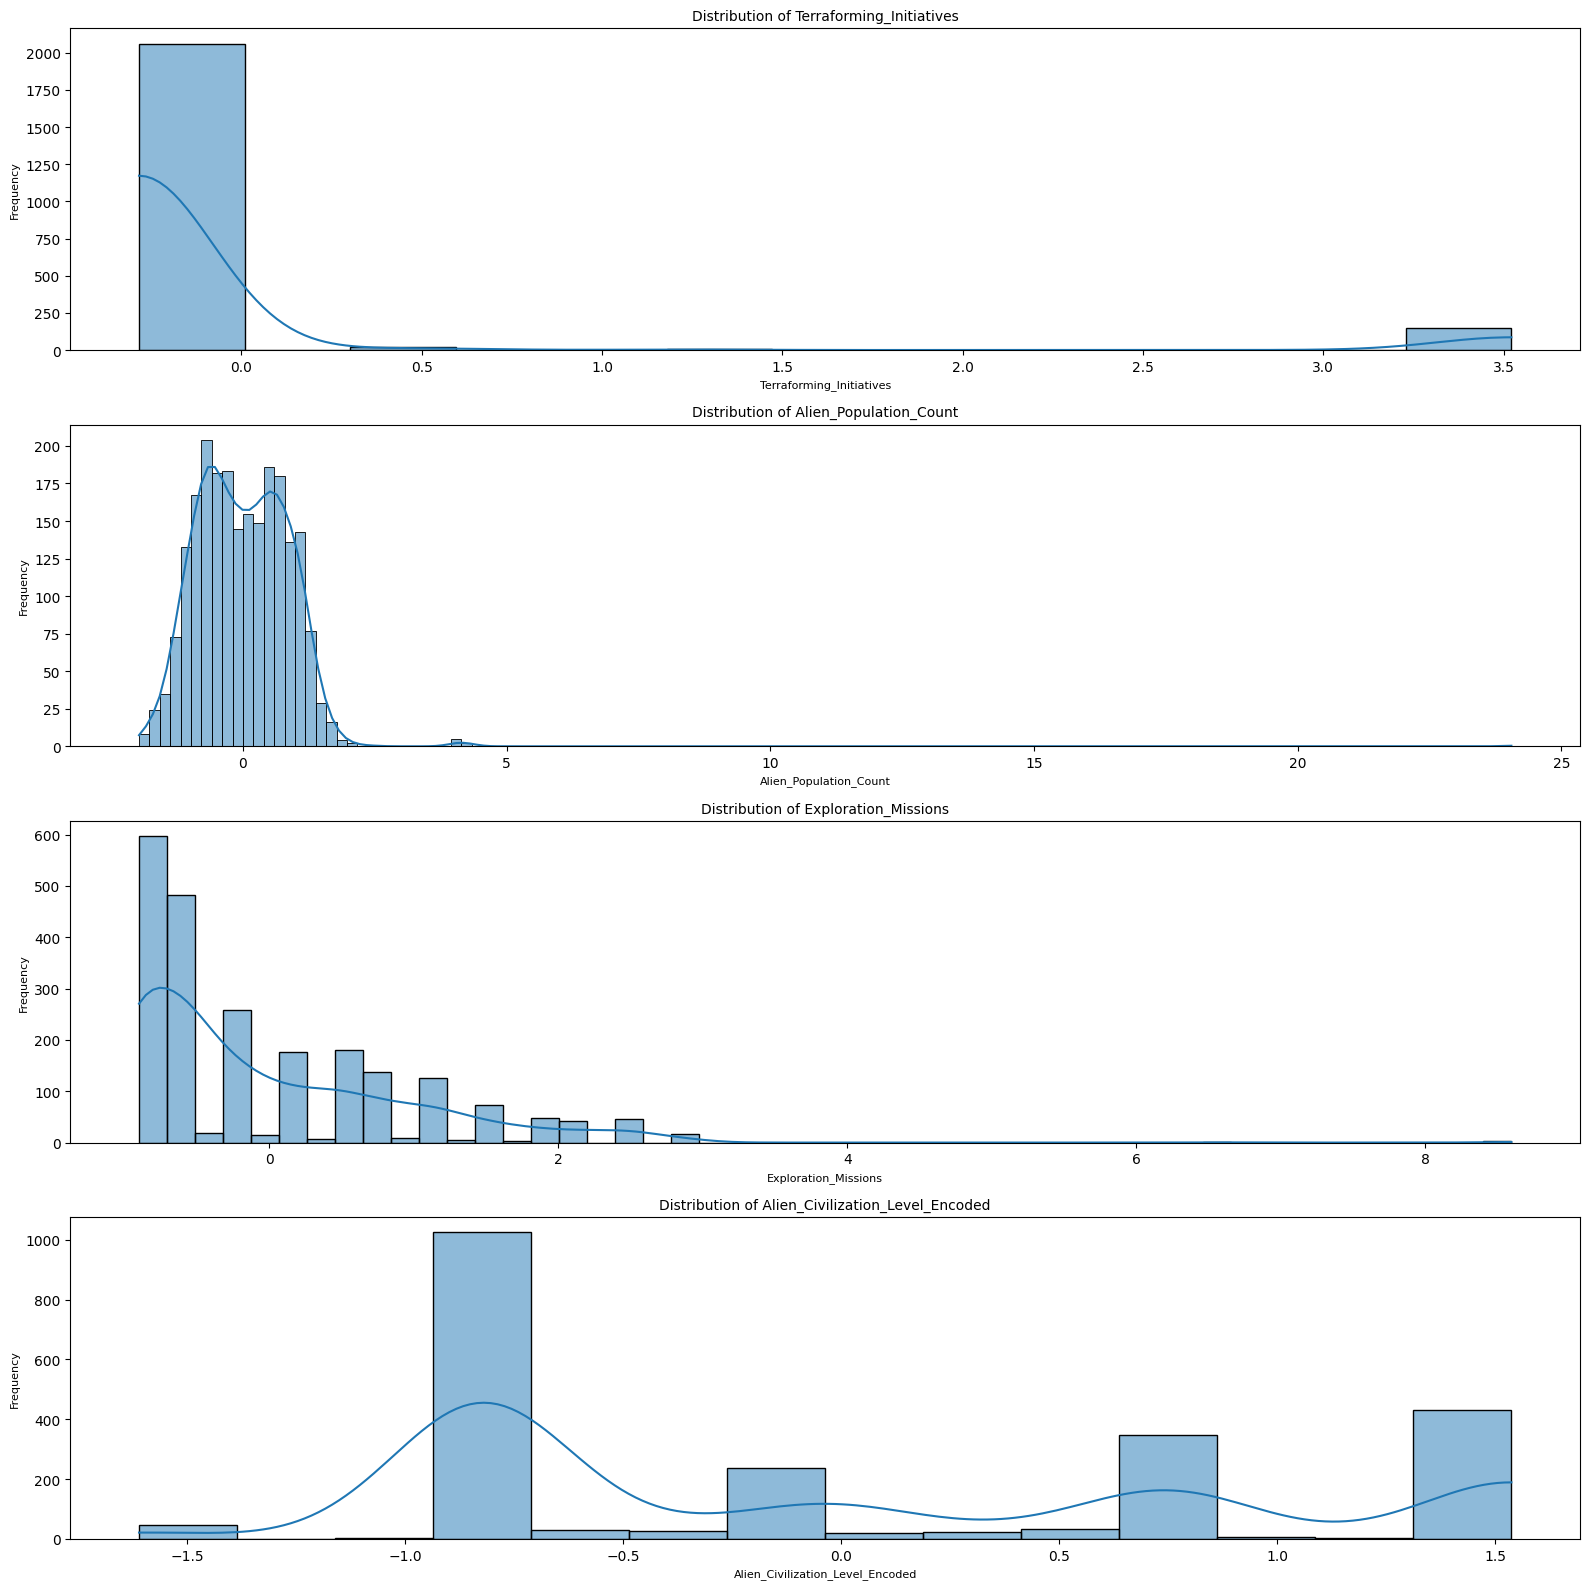

In [133]:
# plots per figure
plots_per_figure = 6

# numerical columns from df_knn_imputed
numeric_columns = df_knn_imputed.select_dtypes(include=['float64', 'int64']).columns

# Check if numeric_columns is populated
if len(numeric_columns) == 0:
    print("Error: 'numeric_columns' is empty. Please check your DataFrame.")
else:
    # Loop through the numerical columns in chunks
    for start in range(0, len(numeric_columns), plots_per_figure):
        plt.figure(figsize=(16, 16))
        
        # Select a subset of columns for the current figure
        subset_columns = numeric_columns[start:start + plots_per_figure]
        
        for i, col in enumerate(subset_columns, 1):
            # Plot each numerical column
            plt.subplot(len(subset_columns), 1, i)  # One column per row
            sns.histplot(df_knn_imputed[col].dropna(), kde=True)
            plt.title(f'Distribution of {col}', fontsize=10)
            plt.xlabel(col, fontsize=8)
            plt.ylabel('Frequency', fontsize=8)
        
        plt.tight_layout()
        plt.show()


### Conclusions

The following features : 
- Military_Engagements
- Peace_Treaty_Accords
- Trade_Agreements_Signed
- Galactic_Visits

Show minimal variance, therefore are less informative.

### Filtering again the dataset


In [134]:
columns_chosen = [
    'Ammonia_Concentration', 'Sulfur_Concentration', 'HeavyMetals_Concentration', 
    'CO2_Concentration', 'Hydrogen_Concentration', 'Precious_Metal_Trade_Tons', 
    'Food_Production_Tons', 'Mineral_Extraction_Tons', 'Resource_Mining_Operations', 
    'Resource_Allocation_Credits', 'Technological_Advancements', 
    'Biological_Research_Units', 'Offspring_Colonies', 'Liquid_Energy_Consumption_Terawatts', 
    'Terraforming_Initiatives', 
    'Alien_Civilization_Level_Encoded', 'Alien_Population_Count', 'Exploration_Missions',
    
]

df_4 = df_knn_imputed[columns_chosen]


## Correlation matrix
(by the df_knn_imputed)

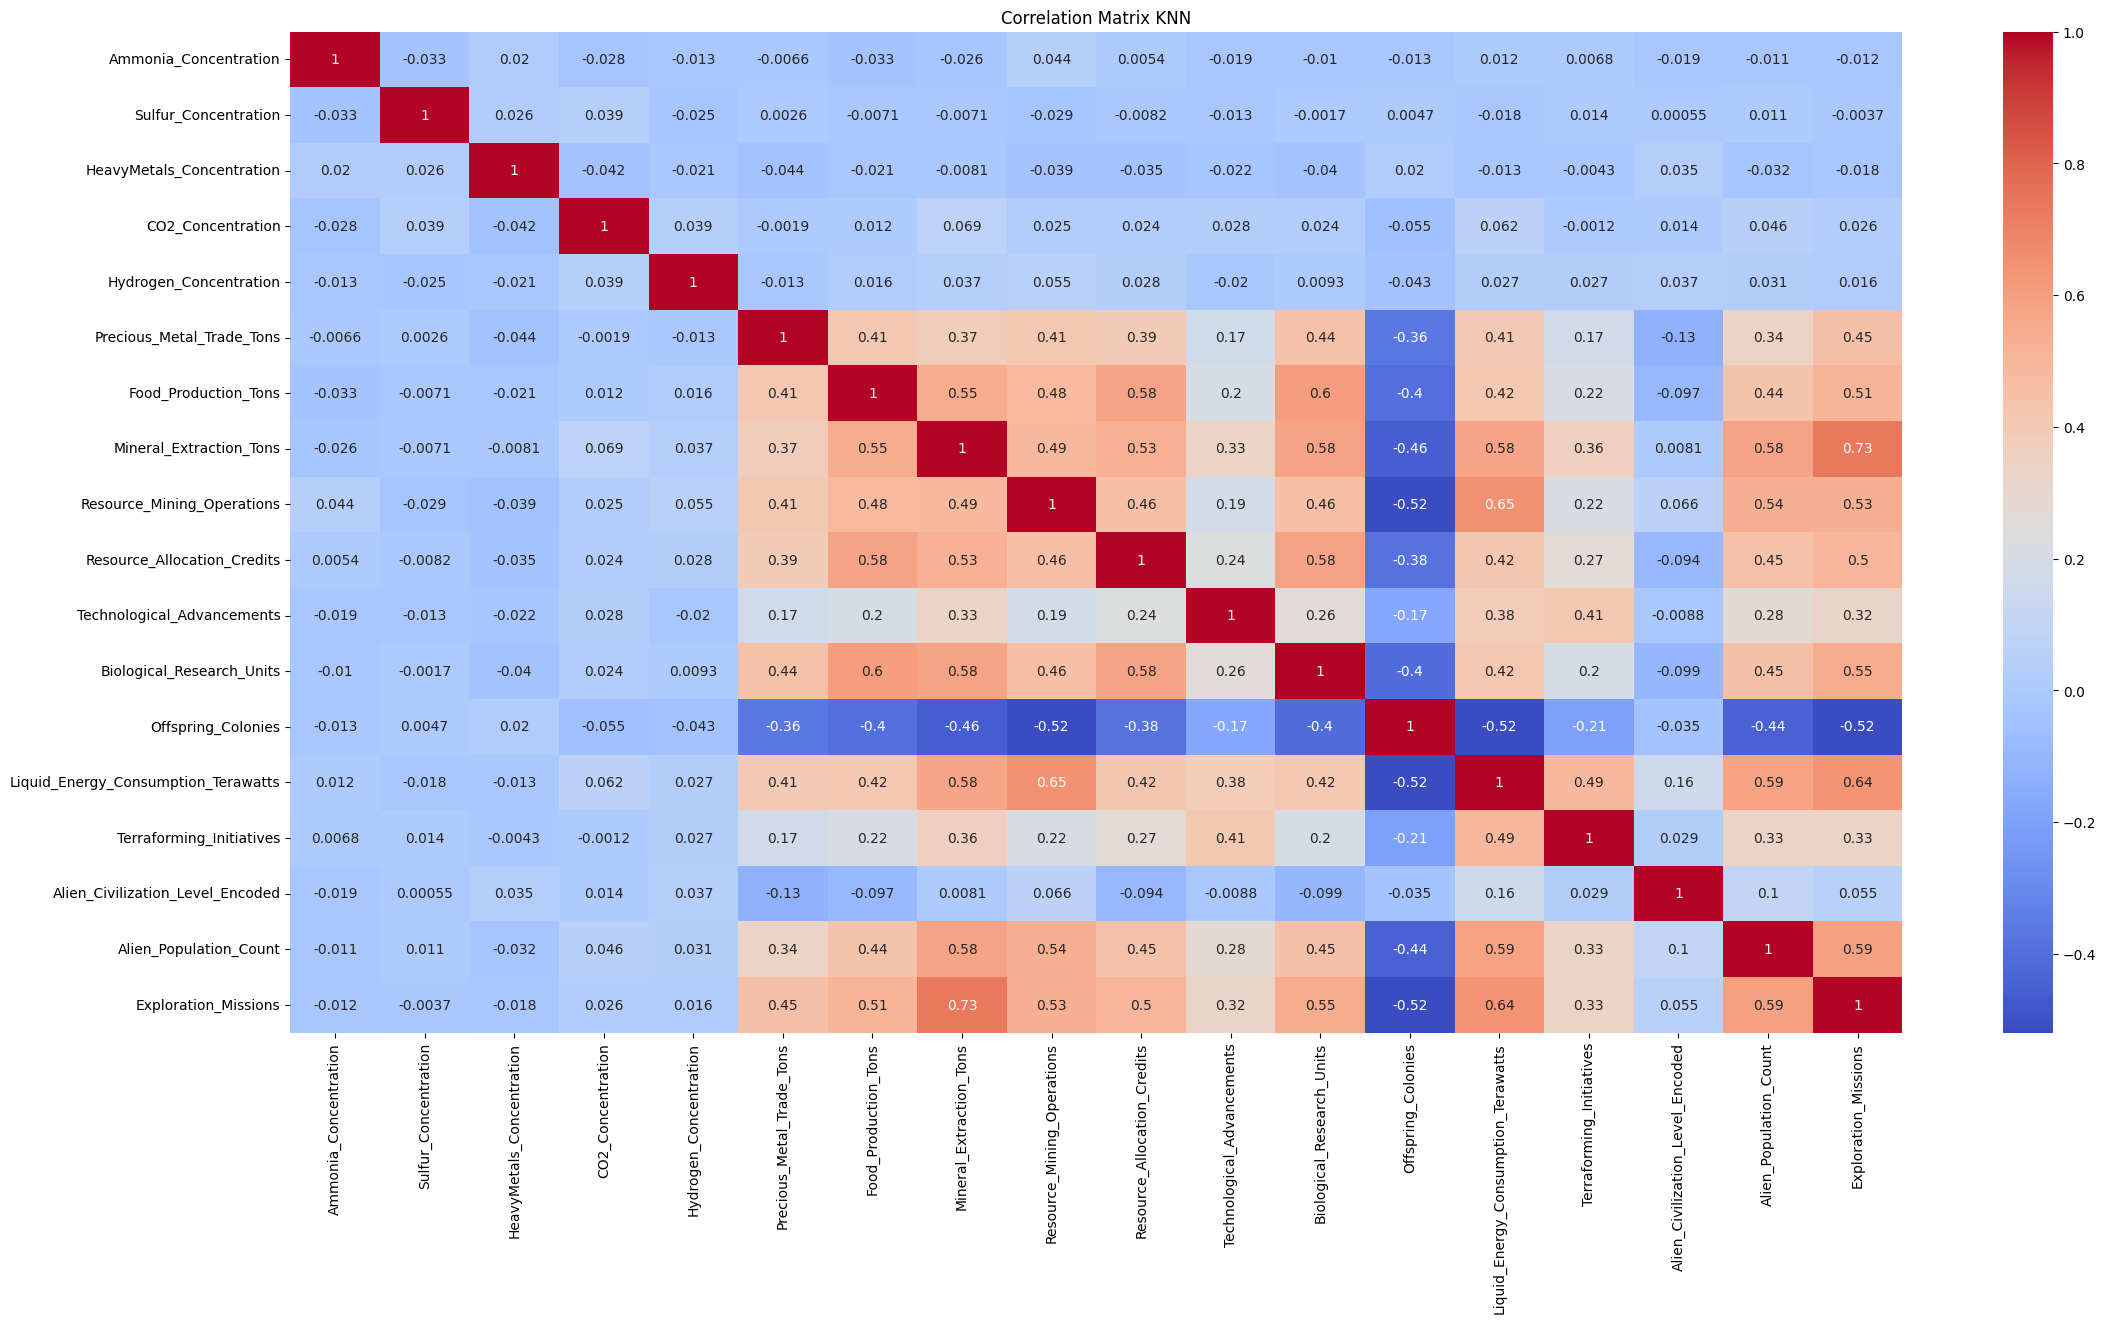

In [ ]:
# Filter only numeric columns
numeric_df = df_4.select_dtypes(include=[np.number])

# Plot correlation matrix for numeric columns
plt.figure(figsize=(26, 13))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix KNN') 
plt.show()

### Interpretation


###  1. Positive Correlations
 #### - Strong positive correlations:
Some pairs of features show strong positive correlations, e.g.:

Food_Production_Tons and Mineral_Extraction_Tons (~0.73).

Resource_Mining_Operations and Liquid_Energy_Consumption_Terawatts (~0.65).

Biological_Research_Units and Food_Production_Tons (~0.6).

Alien_Population_Count and Exploration_Missions (~0.59).

These features likely tied to similar processes or behaviors in the dataset.

 For example, planets with higher food production might also require more mineral extraction, and similarly, planets with high biological research might have high food production to support life.

 ##### - Moderate Positive Correlations:

Resource_Allocation_Credits and Liquid_Energy_Consumption_Terawatts (~0.58).

Alien_Population_Count and Resource_Mining_Operations (~0.54).

These moderate correlations suggest some relationship, but they are not tightly linked pairs.

### 2. Negative Correlations
 ##### - Strong Negative Correlations:

Offspring_Colonies and Liquid_Energy_Consumption_Terawatts (~-0.52).

Offspring_Colonies and Resource_Mining_Operations (~-0.52).

These strong negative correlations suggest that planets with many offspring colonies tend to have lower energy consumption and mining operations. This could indicate that such planets prioritize expansion and colonization over resource extraction.
 #### - Moderate Negative Correlations:

Peace_Treaty_Accords and Food_Production_Tons (~-0.4).

Offspring_Colonies and Food_Production_Tons (~-0.36).

Moderate negative correlations highlight some opposing trends but are less critical than the strong negative ones.

### 3. Neutral Correlations
Features like Ammonia_Concentration, Sulfur_Concentration, and HeavyMetals_Concentration show weak or near-zero correlations with many other features. This suggests these features are relatively independent or have minimal interaction with others in this dataset.

## Visualizing relevant correlations 

This visualization will show the important feature correlations (both positive and negative), sorted by magnitude. The correlations are color-coded:
- Green bars: Represent positive correlations.
- Red bars: Represent negative correlations.

Total relevant correlations : 29


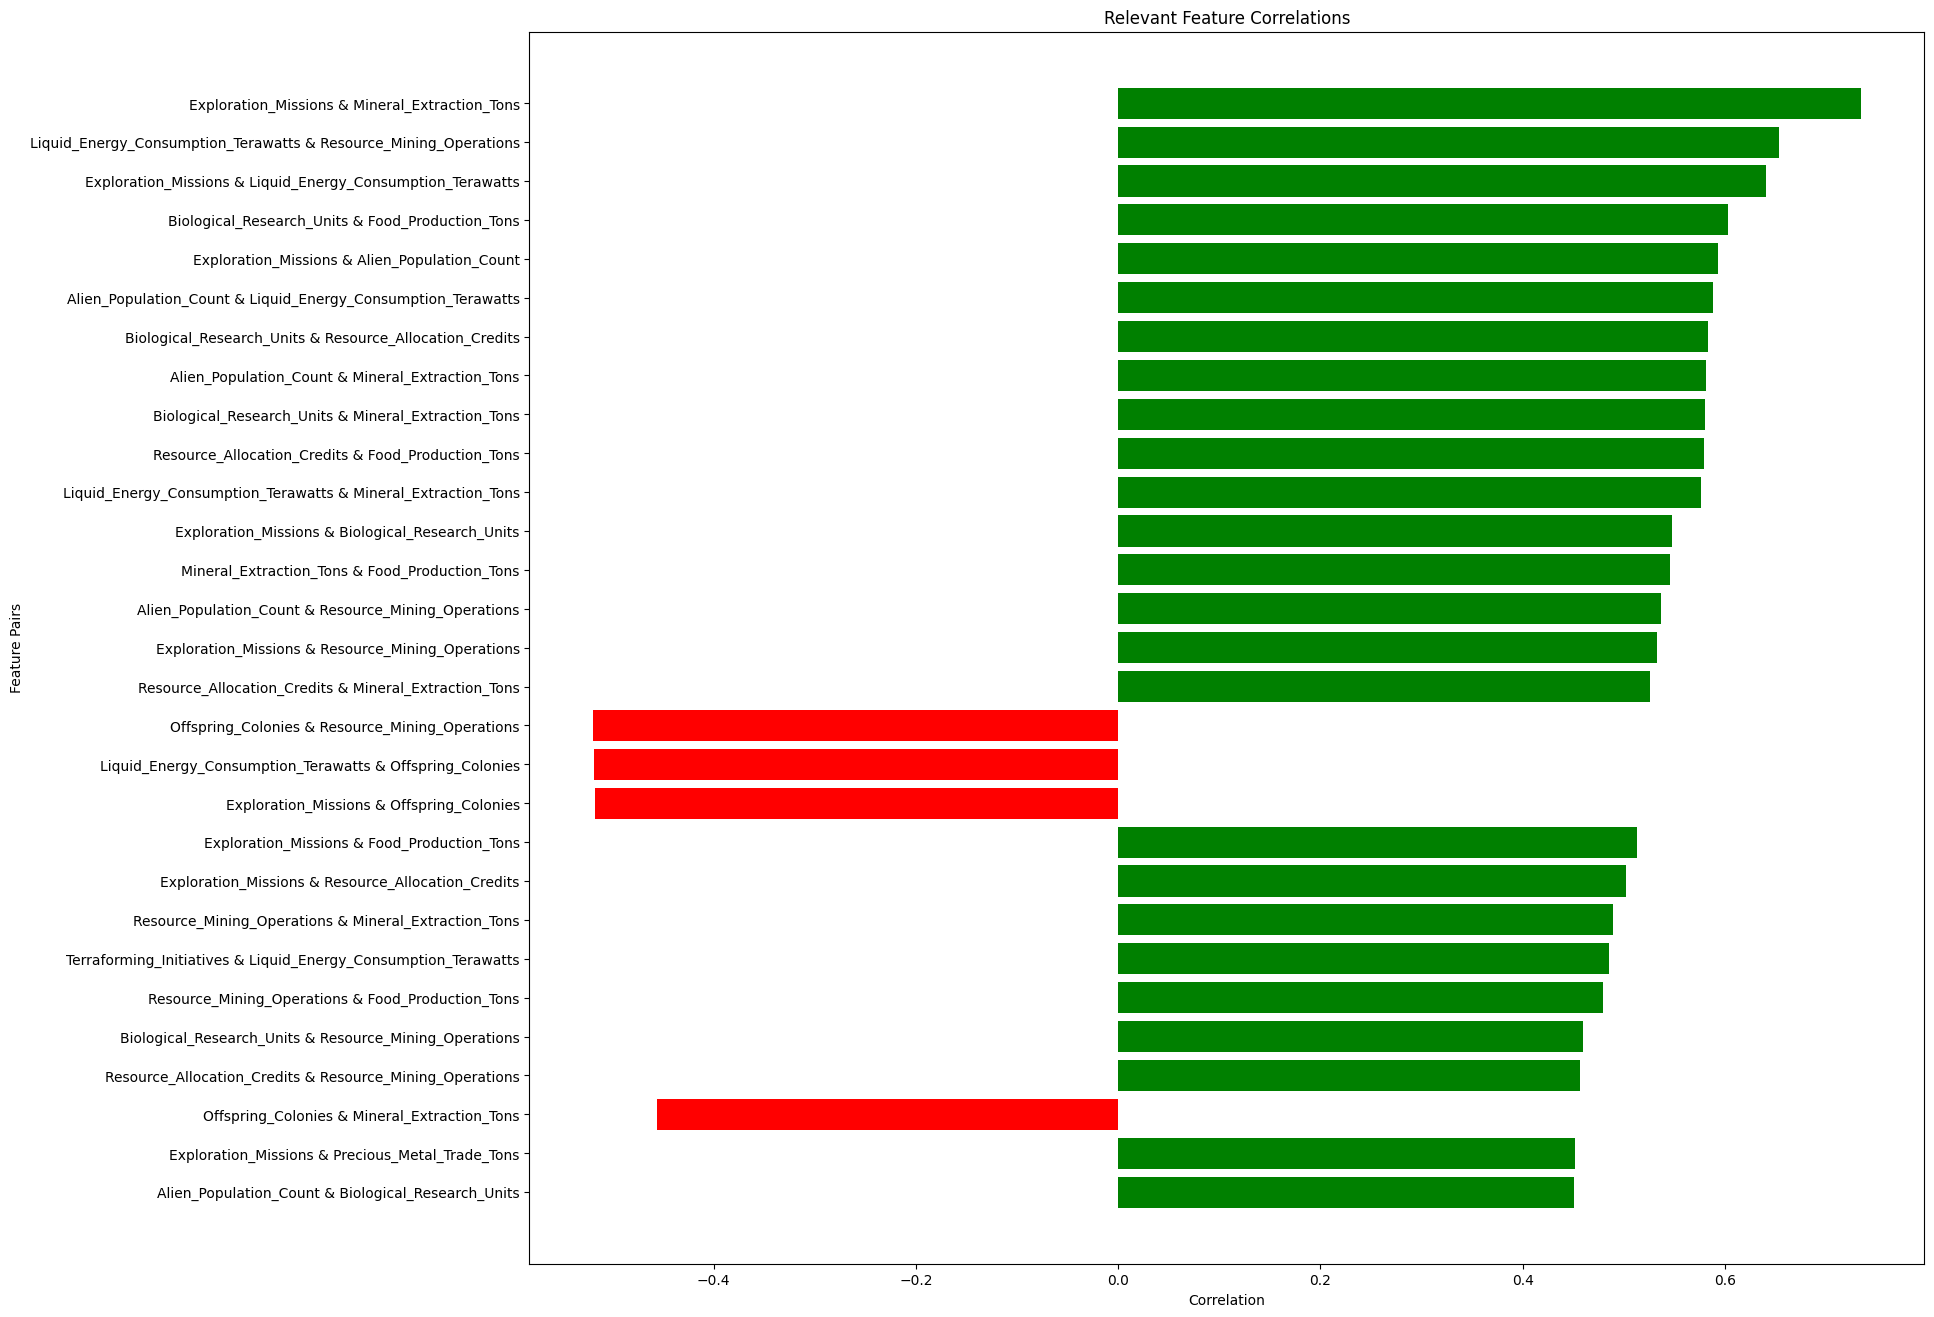

In [136]:
correlation_matrix = df_4.corr()
# Extract correlations (upper triangle only to avoid duplicates)
correlations = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Flatten the correlations into a DataFrame and sort by absolute value
correlation_pairs = correlations.unstack().dropna().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
correlation_pairs['Abs Correlation'] = correlation_pairs['Correlation'].abs()

# Sort by absolute correlation
sorted_correlations = correlation_pairs.sort_values(
    by='Abs Correlation', ascending=False
).reset_index(drop=True)

#Filter for high correlations (e.g., > 0.45)
important_correlations = sorted_correlations[
    sorted_correlations['Abs Correlation'] > 0.45
]

#Display the relevant correlations as a table
print("Total relevant correlations :" ,len(important_correlations))

#Plot top correlations
plt.figure(figsize=(18, 16))
plt.barh(
    important_correlations.index,
    important_correlations['Correlation'],
    color=important_correlations['Correlation'].apply(lambda x: 'green' if x > 0 else 'red')
)
plt.yticks(
    important_correlations.index,
    important_correlations.apply(lambda row: f"{row['Feature 1']} & {row['Feature 2']}", axis=1)
)
plt.title("Relevant Feature Correlations")
plt.xlabel("Correlation")
plt.ylabel("Feature Pairs")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()


# Problem definition

Clustering is the appropriate choice for our project because:
- The dataset lacks labeled output (unsupervised learning).
- The goal is to group planets based on shared characteristics.


# 2nd part
- Further Selection of Features;
- Preprocess Data: Normalization.
- Try Different Clustering Models: K-Means, DBSCAN, Hierarchical.
- Evaluate Results: Visualize clusters and interpret their characteristics.

## 1. Selecting feautures



### Summary of Feature Selection


Based on the analysis of correlations, the following features have been selected for focus in the clustering models. Among highly correlated features, only a subset was chosen, while those with strong negative correlations were included to enhance distinctiveness in the analysis.

In [ ]:
relevant_features = [
    "Food_Production_Tons",
    "Mineral_Extraction_Tons",
    "Resource_Mining_Operations", 
    "Resource_Allocation_Credits",
    "CO2_Concentration",
    "Liquid_Energy_Consumption_Terawatts",
    "Offspring_Colonies",
    "Technological_Advancements",
    "Biological_Research_Units",
    "Alien_Population_Count",
    "Exploration_Missions",
    "Alien_Civilization_Level_Encoded"]

# Create a new DataFrame with the specified features
filtered_df = numeric_df[relevant_features]

from sklearn.preprocessing import MinMaxScaler

# Normalize the data before clustering
scaler = MinMaxScaler()
X = scaler.fit_transform(filtered_df) #X will be my variable where the dataset is stored to use in the clustering models

# View the first few rows of the normalized DataFrame
df_5= pd.DataFrame(X, columns=relevant_features)
df_5.head()


['Food_Production_Tons', 'Mineral_Extraction_Tons', 'Resource_Mining_Operations', 'Resource_Allocation_Credits', 'CO2_Concentration', 'Liquid_Energy_Consumption_Terawatts', 'Offspring_Colonies', 'Technological_Advancements', 'Biological_Research_Units', 'Alien_Population_Count', 'Exploration_Missions', 'Alien_Civilization_Level_Encoded']


,Food_Production_Tons,Mineral_Extraction_Tons,Resource_Mining_Operations,Resource_Allocation_Credits,CO2_Concentration,Liquid_Energy_Consumption_Terawatts,Offspring_Colonies,Technological_Advancements,Biological_Research_Units,Alien_Population_Count,Exploration_Missions,Alien_Civilization_Level_Encoded
0,0.537688,0.226667,0.676923,0.254753,1.000000,0.433356,0.0,0.0,0.675676,0.115131,0.142857,0.75
1,0.246231,0.242203,0.846154,0.030418,1.000000,0.389149,0.0,0.0,0.166023,0.091801,0.214286,0.75
2,0.266332,0.210435,1.000000,0.406844,0.444444,0.486269,0.0,0.0,0.474903,0.101192,0.321429,0.25
3,0.015075,0.030725,0.307692,0.011407,0.355556,0.210315,0.0,0.0,0.015444,0.063262,0.107143,0.75
4,0.296482,0.102609,0.615385,0.019011,0.777778,0.194240,0.0,0.0,0.297297,0.084560,0.214286,0.25


# Testing different models




- 1. Fit K-Means, DBSCAN, and Hierarchical Clustering.
- 2. Evaluate their performance.
- 3. Compare results and select the best model.

## Hierachical clustering

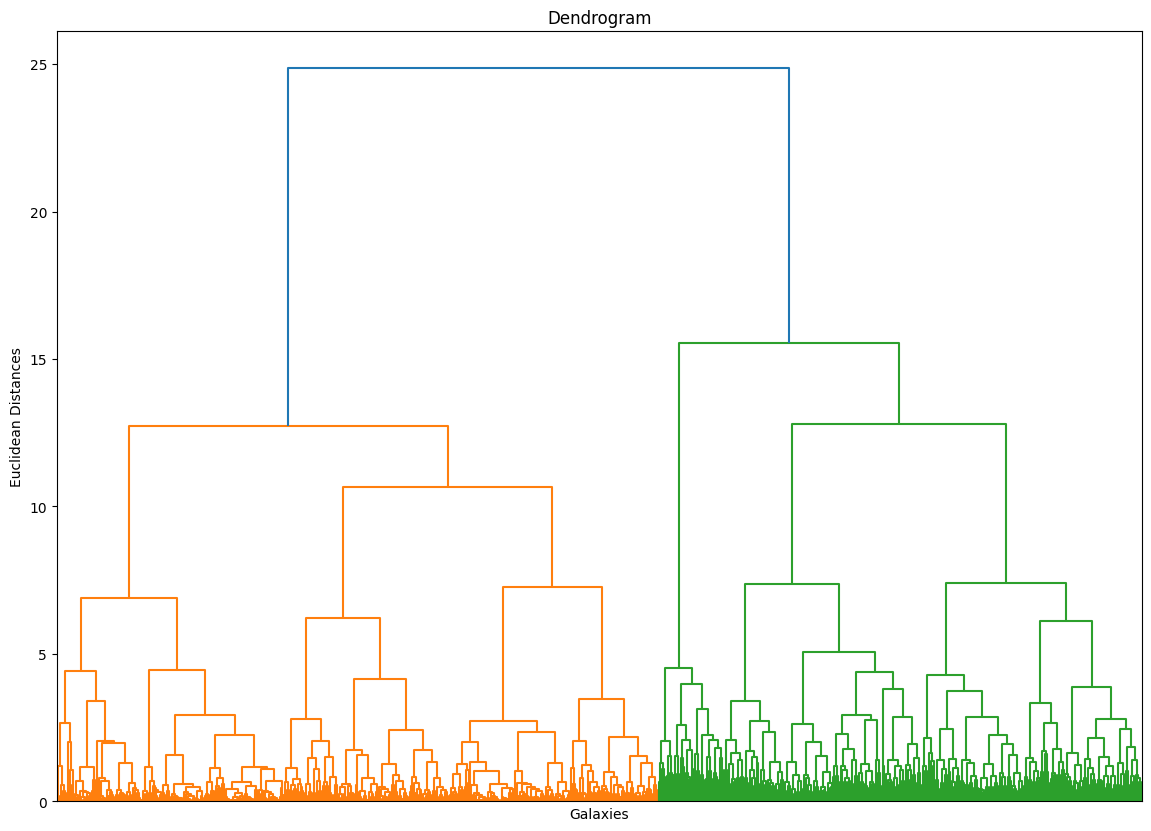

In [ ]:
# Using the dendrogram to find the optimal number of clusters
plt.figure(figsize=(14, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), no_labels=True)
plt.title('Dendrogram')
plt.xlabel('Galaxies')
plt.ylabel('Euclidean Distances')
plt.show()


Silhouette Score for Hierarchical Clustering with 3 clusters: 0.26728000045234274


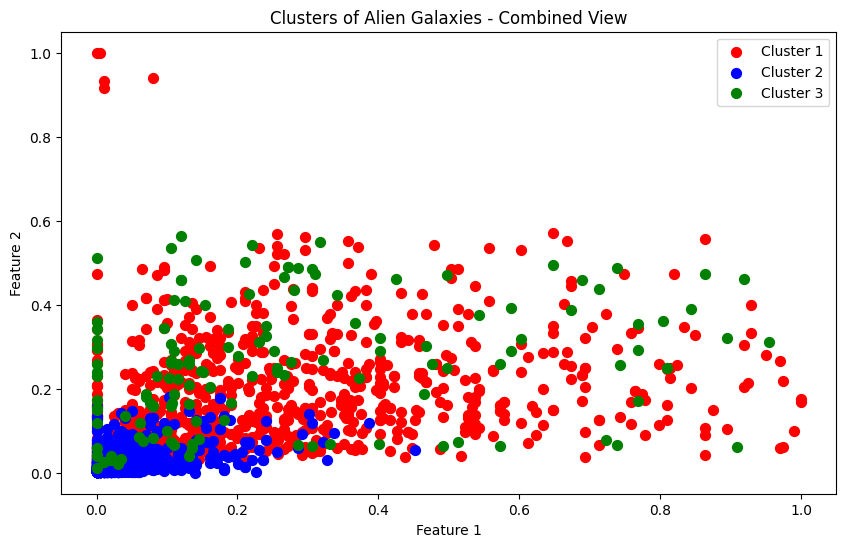

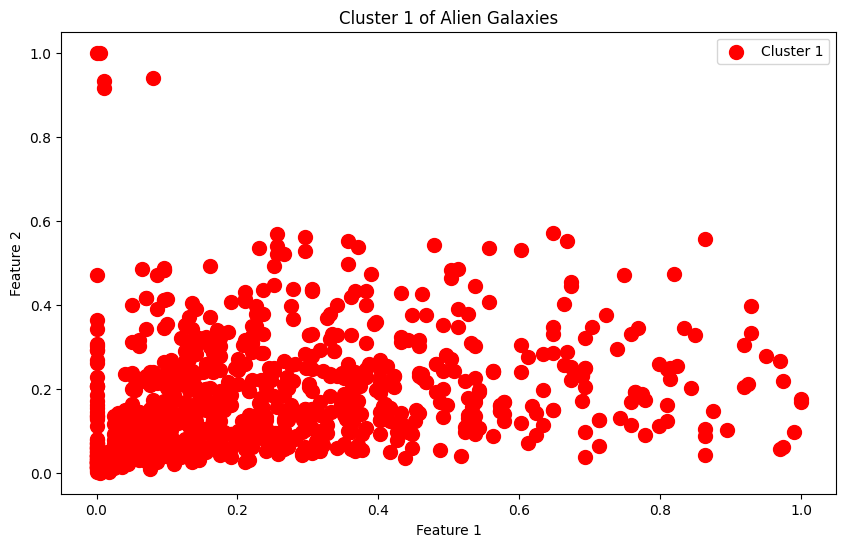

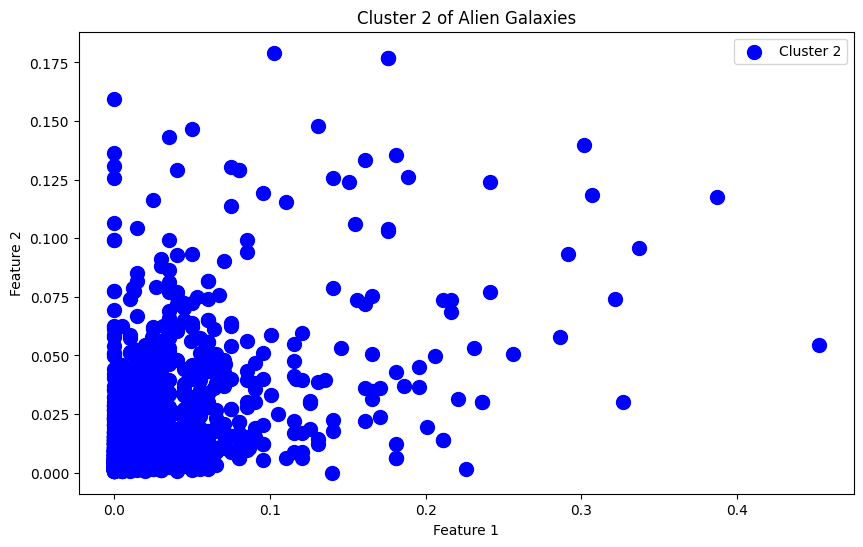

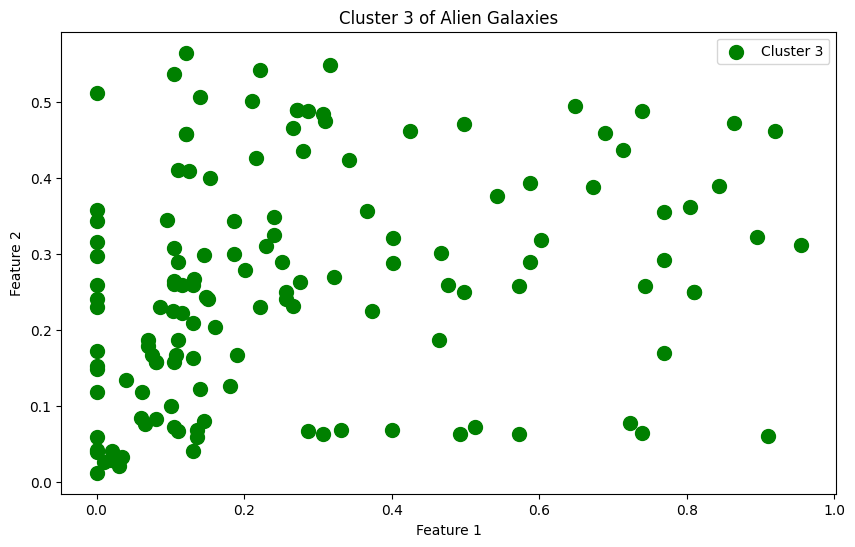

In [139]:
# Fitting Hierarchical Clustering to the dataset
optimal_clusters = 3  # Based on dendrogram observation
hc = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Calculate and print the silhouette score for hierarchical clustering
silhouette_avg = silhouette_score(X, y_hc, metric='euclidean')
print(f"Silhouette Score for Hierarchical Clustering with {optimal_clusters} clusters: {silhouette_avg}")

# Visualizing all clusters together
colors = ['red', 'blue', 'green', 'orange', 'purple']
plt.figure(figsize=(10, 6))
for idx in range(optimal_clusters):
    plt.scatter(X[y_hc == idx, 0], X[y_hc == idx, 1], s=50, color=colors[idx], label=f'Cluster {idx + 1}')
plt.title('Clusters of Alien Galaxies - Combined View')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Visualizing each cluster separately with different colors
for idx in range(optimal_clusters):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y_hc == idx, 0], X[y_hc == idx, 1], s=100, color=colors[idx], label=f'Cluster {idx + 1}')
    plt.title(f'Cluster {idx + 1} of Alien Galaxies')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


#### Dscription 
Cluster 1 (Red)
This cluster dominates the dataset and spans a wide range of the feature space. Colonies in this cluster likely share common characteristics but display variability within their features, such as food production, mineral extraction, and population count. This could represent "generalist" colonies with diverse but overlapping needs and operations.

Cluster 2 (Blue)
This is a compact, dense cluster located in the lower-left region of the plot, indicating colonies with similar and relatively low feature values. These might be smaller or less advanced colonies with limited resource operations, technological advancements, and energy consumption. It could represent "developing" colonies with basic and uniform needs.

Cluster 3 (Green)
This cluster is more scattered and overlaps significantly with Cluster 1. Colonies in this cluster might represent transitional or specialized cases, showing distinct but not completely separable characteristics. For example, they might have moderate levels of technological advancements, exploration missions, or alien population counts. The overlap suggests that these colonies might share needs or operations with those in Cluster 1.

## K-means clustering

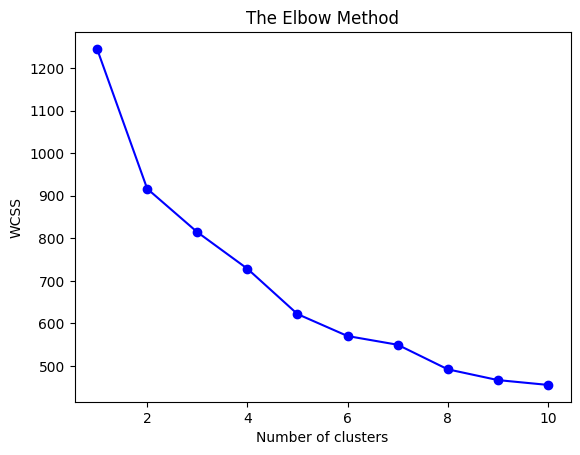

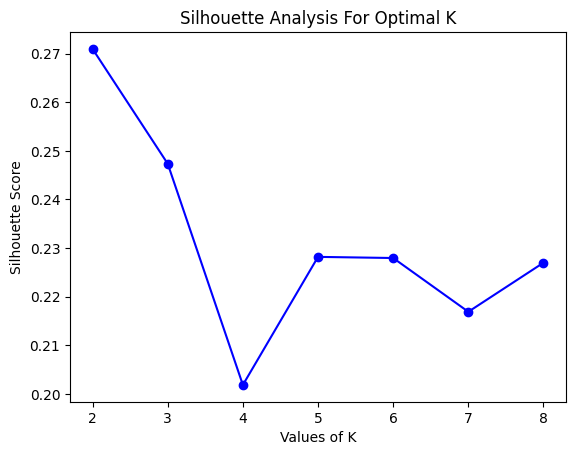

In [140]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, 'bo-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Silhouette Score Analysis
sil_avg = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    sil_avg.append(silhouette_score(X, labels, metric='euclidean'))
plt.plot(range_n_clusters, sil_avg, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal K')
plt.show()

The optimal number of clusters for K-Means appears to be 5, as it balances both a high Silhouette Score and a clear elbow in the WCSS plot.

Silhouette Score for K-Means with 5 clusters: 0.22818156113621912


C:\Users\franc\AppData\Local\Temp\ipykernel_22080\3051224640.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", optimal_clusters).colors  # Use a colormap to generate colors


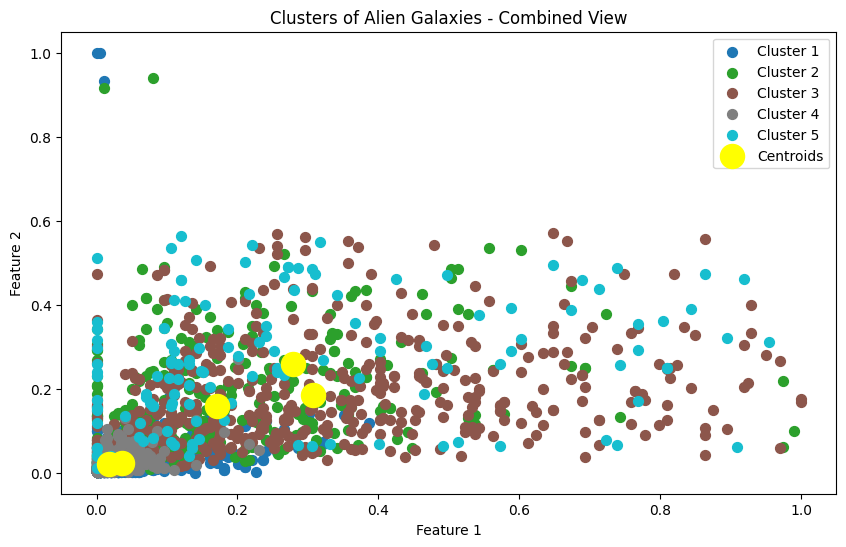

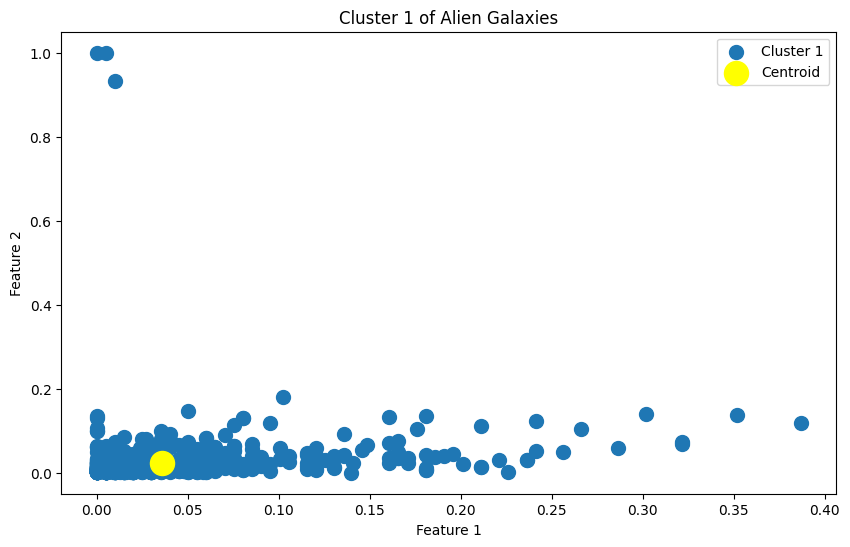

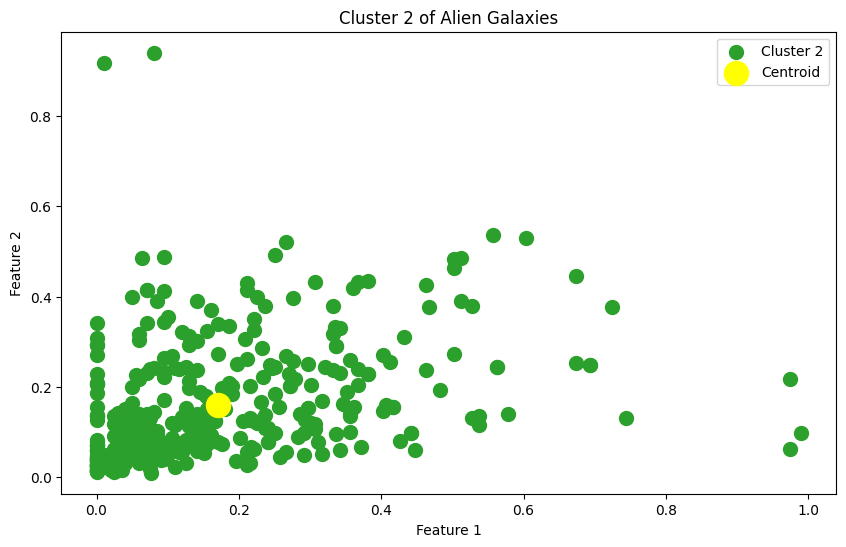

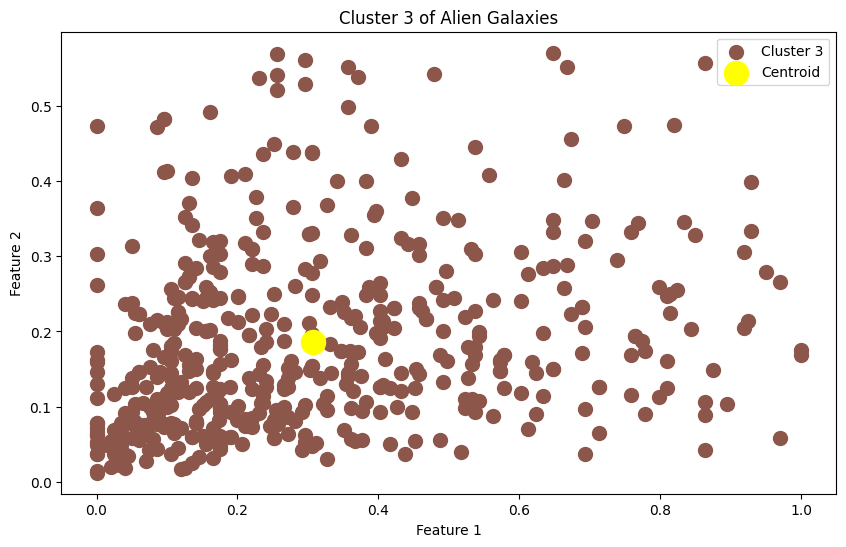

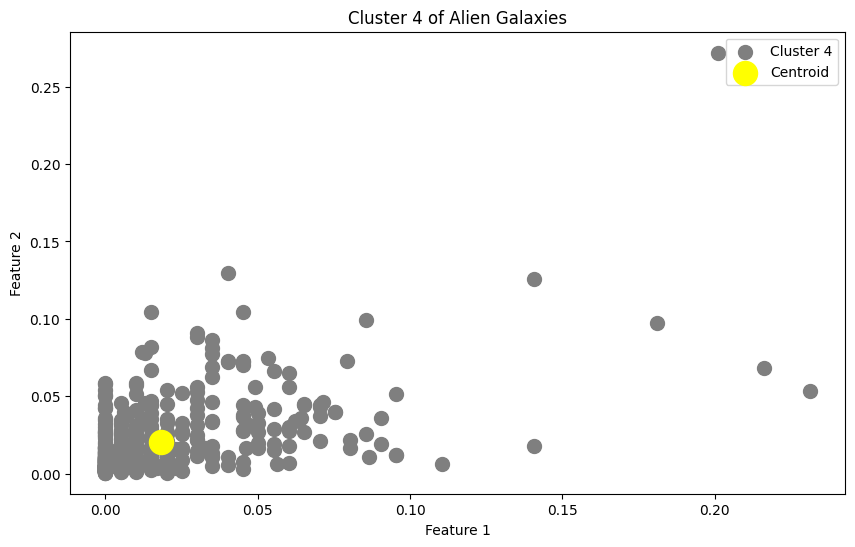

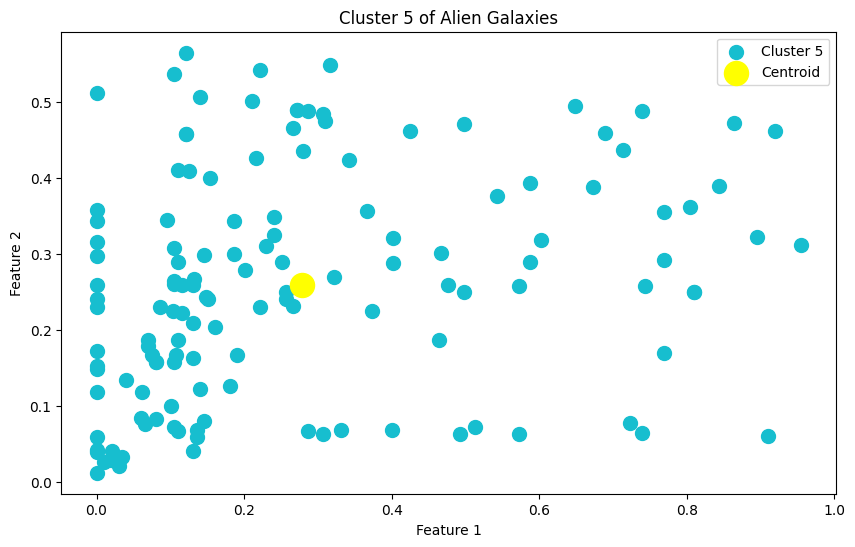

In [141]:

# Fitting K-Means to the dataset with optimal clusters
optimal_clusters = 5  # Choose based on elbow and silhouette method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Silhouette score for the chosen number of clusters
silhouette_avg = silhouette_score(X, y_kmeans, metric='euclidean')
print(f"Silhouette Score for K-Means with {optimal_clusters} clusters: {silhouette_avg}")

colors = plt.cm.get_cmap("tab10", optimal_clusters).colors  # Use a colormap to generate colors

# Visualizing all clusters together
plt.figure(figsize=(10, 6))
for idx in range(optimal_clusters):
    plt.scatter(X[y_kmeans == idx, 0], X[y_kmeans == idx, 1], s=50, color=colors[idx], label=f'Cluster {idx + 1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Alien Galaxies - Combined View')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Visualizing each cluster separately with different colors
for idx in range(optimal_clusters):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y_kmeans == idx, 0], X[y_kmeans == idx, 1], s=100, color=colors[idx], label=f'Cluster {idx + 1}')
    plt.scatter(kmeans.cluster_centers_[idx, 0], kmeans.cluster_centers_[idx, 1], s=300, c='yellow', label='Centroid')
    plt.title(f'Cluster {idx + 1} of Alien Galaxies')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()




#### Description
Cluster 1 (Blue)
A dense and compact cluster located in the lower-left corner, likely representing colonies with low levels of most features, such as resource operations, energy consumption, and technological advancements. These could be "developing" colonies with limited activities and basic needs.

Cluster 2 (Green)
A scattered cluster with moderate overlap with other groups, particularly Clusters 3 and 5. Colonies in this cluster might have intermediate values in features such as exploration missions, population count, and resource allocation, making them transitional or semi-specialized colonies.

Cluster 3 (Brown)
The largest cluster, distributed broadly across the feature space, represents a diverse group of colonies. These colonies may exhibit a wide range of characteristics, such as varying levels of food production, mineral extraction, and technological advancements, reflecting generalist colonies with diverse operational strategies.

Cluster 4 (Gray)
A small and distinct cluster, with colonies likely exhibiting unique or extreme feature values, such as very high or low CO2 concentration, offspring colonies, or resource usage. These colonies could represent outliers or highly specialized entities.

Cluster 5 (Cyan)
A moderately dense cluster with overlap with Cluster 3. These colonies may have similar but slightly more cohesive characteristics compared to the brown cluster, potentially representing a subgroup of colonies focused on specific operations, such as biological research or energy consumption.

Centroids (Yellow)
The centroids mark the central tendencies of each cluster, highlighting the differences in their overall feature distributions.

## DBSCAN clustering

In [ ]:
# Applying DBSCAN to the dataset
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)

# Silhouette Score Analysis (if clusters are formed)
if len(set(dbscan_labels)) > 1:
    sil_score = silhouette_score(X, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {sil_score}")
else:
    print("DBSCAN did not form valid clusters.")



Silhouette Score for DBSCAN: 0.3463399885230034


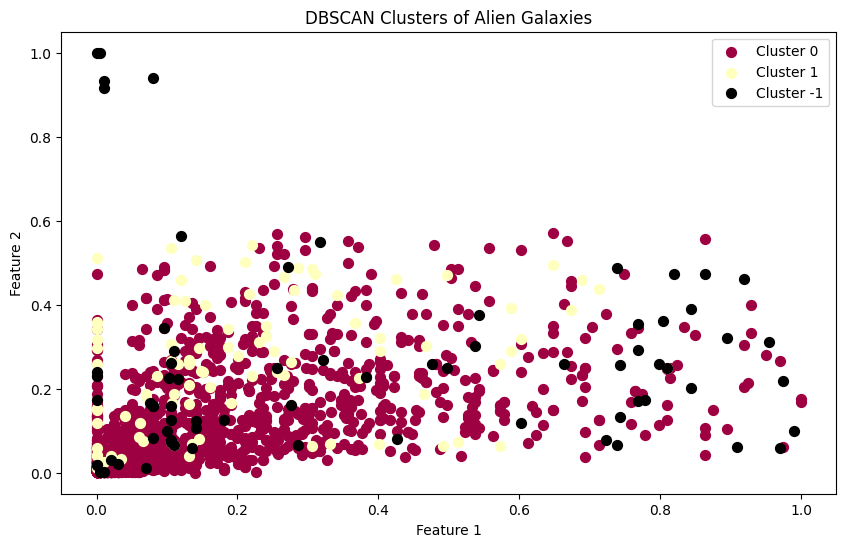

In [ ]:
# Visualizing all clusters together
unique_labels = set(dbscan_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(10, 6))
for label, color in zip(unique_labels, colors):
    if label == -1:  # Noise points
        color = [0, 0, 0, 1]  # Black
    plt.scatter(X[dbscan_labels == label, 0], X[dbscan_labels == label, 1], s=50, color=color, label=f'Cluster {label}')
plt.title('DBSCAN Clusters of Alien Galaxies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#### Interpretation
Cluster 0 (Maroon)
This is the largest and densest cluster, representing alien colonies with relatively uniform characteristics. These colonies might share similar levels of resource mining operations, food production, and technological advancements, suggesting a balance in their development. Their CO2 concentration, liquid energy consumption, and biological research efforts might also indicate moderate sustainability practices and stable population dynamics. This cluster could represent "typical" colonies with average needs and operations.

Cluster 1 (Yellow)
This smaller cluster likely represents alien colonies with distinct characteristics compared to the majority. These colonies might have:

Higher or lower values in technological advancements, exploration missions, or alien civilization level, indicating a different stage of development.
Unique patterns in liquid energy consumption or offspring colonies, reflecting a different approach to energy use and population expansion. This cluster may signify "specialized" colonies, potentially at an advanced or early stage of development.

Cluster -1 (Black, Outliers)
This cluster represents noise or outliers, colonies that deviate significantly from the patterns observed in Clusters 0 and 1. These colonies could have extreme values in one or more features, such as:

Exceptionally high or low food production, CO2 concentration, or alien population count, suggesting unique environmental or operational circumstances.
Atypical resource allocation credits or mineral extraction efforts, which could indicate either resource abundance or scarcity.

# Evaluations and results:



parameters of evaluations, why are why valuating with siluette and davies bouldin

In [144]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

def compare_clustering_models(X):
    results = []
    
    # Hierarchical Clustering
    
    hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
    hc_labels = hc.fit_predict(X)
    hc_silhouette = silhouette_score(X, hc_labels)
    hc_db_score = davies_bouldin_score(X, hc_labels)
    results.append({'Model': 'Hierarchical Clustering', 'Silhouette Score': hc_silhouette, 'Davies-Bouldin Score': hc_db_score})
    

    # K-Means Clustering
    #print("Evaluating K-Means Clustering...")
    optimal_clusters = 5
    kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_silhouette = silhouette_score(X, kmeans_labels)
    kmeans_db_score = davies_bouldin_score(X, kmeans_labels)
    results.append({'Model': 'K-Means', 'Silhouette Score': kmeans_silhouette, 'Davies-Bouldin Score': kmeans_db_score})
  
    
    
    # DBSCAN
    #print("Evaluating DBSCAN...")
    dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
    dbscan_labels = dbscan.fit_predict(X)
    if len(set(dbscan_labels)) > 1:
        dbscan_silhouette = silhouette_score(X, dbscan_labels)
        dbscan_db_score = davies_bouldin_score(X, dbscan_labels)
        results.append({'Model': 'DBSCAN', 'Silhouette Score': dbscan_silhouette, 'Davies-Bouldin Score': dbscan_db_score})
        
    else:
        results.append({'Model': 'DBSCAN', 'Silhouette Score': None, 'Davies-Bouldin Score': None})
        print("DBSCAN did not form valid clusters.")
    
    # Display Summary of Results
    print("\nSummary of Clustering Results:")
    for res in results:
        print(f"{res['Model']} - Silhouette Score: {res['Silhouette Score']}, Davies-Bouldin Score: {res['Davies-Bouldin Score']}")
    
    return results

# Example usage:
results = compare_clustering_models(X)



Summary of Clustering Results:
Hierarchical Clustering - Silhouette Score: 0.26728000045234274, Davies-Bouldin Score: 1.5293135984984343
K-Means - Silhouette Score: 0.22818156113621912, Davies-Bouldin Score: 1.5606492474393283
DBSCAN - Silhouette Score: 0.3463399885230034, Davies-Bouldin Score: 2.8860844312590146


## Interpretation


- DBSCAN performs best in terms of cluster cohesion and separation (highest silhouette score).
- Hierarchical Clustering is a solid option if compact and distinct clusters are preferred.
- K-Means performs the worst in this context, likely due to its assumption of spherical clusters, which might not align with the nature of the data.